The Spark Foundation

Data science and Business analytics intern (GRIP December 22)

Name: Sourav Dey

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
x = df.iloc[:, 2:4].values
y = df.iloc[:,-1].values

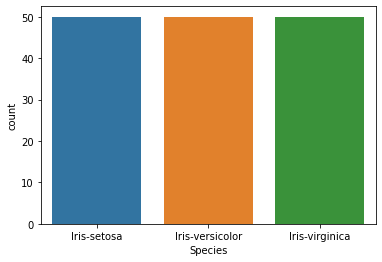

In [12]:
sns.countplot(x='Species', data=df, )
plt.show()

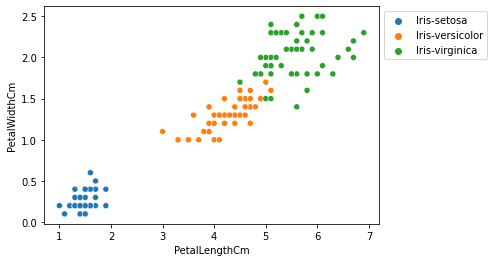

In [13]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df)
plt.legend(bbox_to_anchor=(1,1), loc = 2)
plt.show()

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

In [15]:
y_km = km.fit_predict(x)
print(km.cluster_centers_)

[[3.418      1.464     ]
 [3.03255814 5.67209302]
 [2.75087719 4.32807018]]


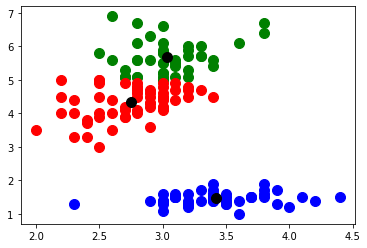

In [16]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1],s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1],s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1],s = 100, c = 'red', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:,   0], km.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')  

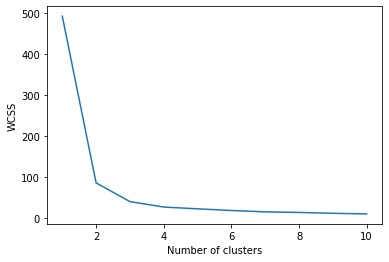

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11): 
    kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()